In [1]:
#importing libraries
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings 
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
Glass = pd.read_csv('/content/glass.csv')
Glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
Glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
Glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
Glass.shape

(214, 10)

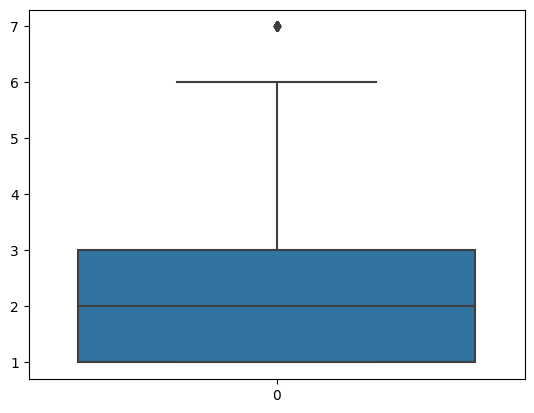

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(Glass['Type'])
plt.show()

**Following are some of the insights of this Whisker plot(Box plot):**
 
 **25% of the features of glass lies at Q1 (category1).**

 **25% of the features of glass lies at Q3 (category3).**

 **6th** **cateogry** **has** **value** **for** **only** **one** **of** **the** **features** **from** **given** **features**
 **There** **is** **one** **outliers** **present** **at** **7th** **category**

**Median is at category 2 means exactly half of the features lies at 2nd    category.**

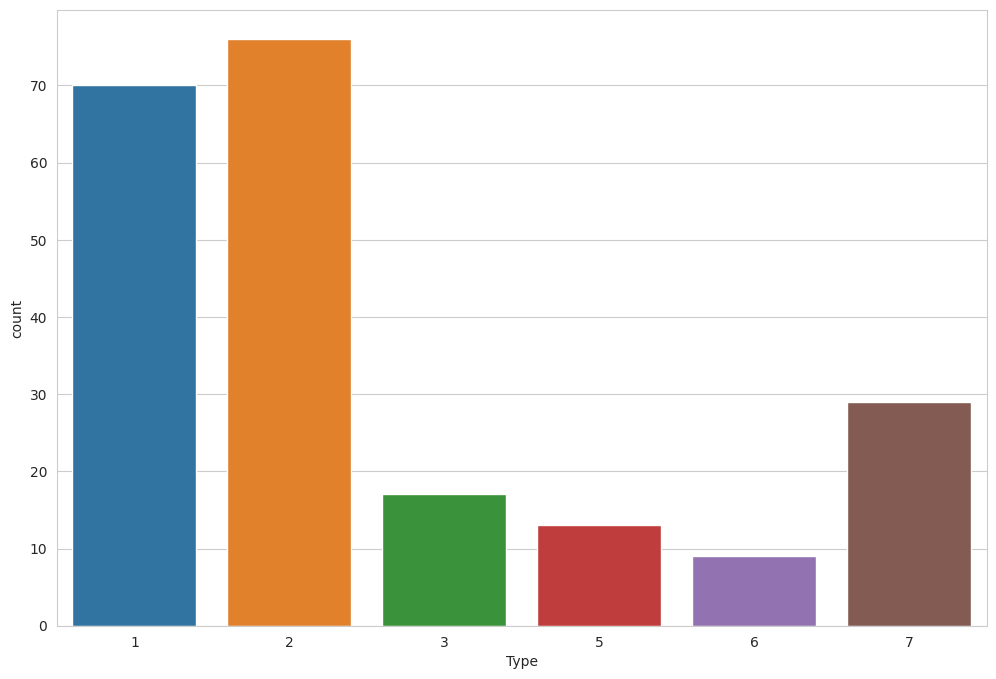

In [50]:
sns.countplot(x='Type', data=Glass)
plt.show()

**Maximum number of the features belongs to the category 1 & category 2 where very less features belong to category 6**

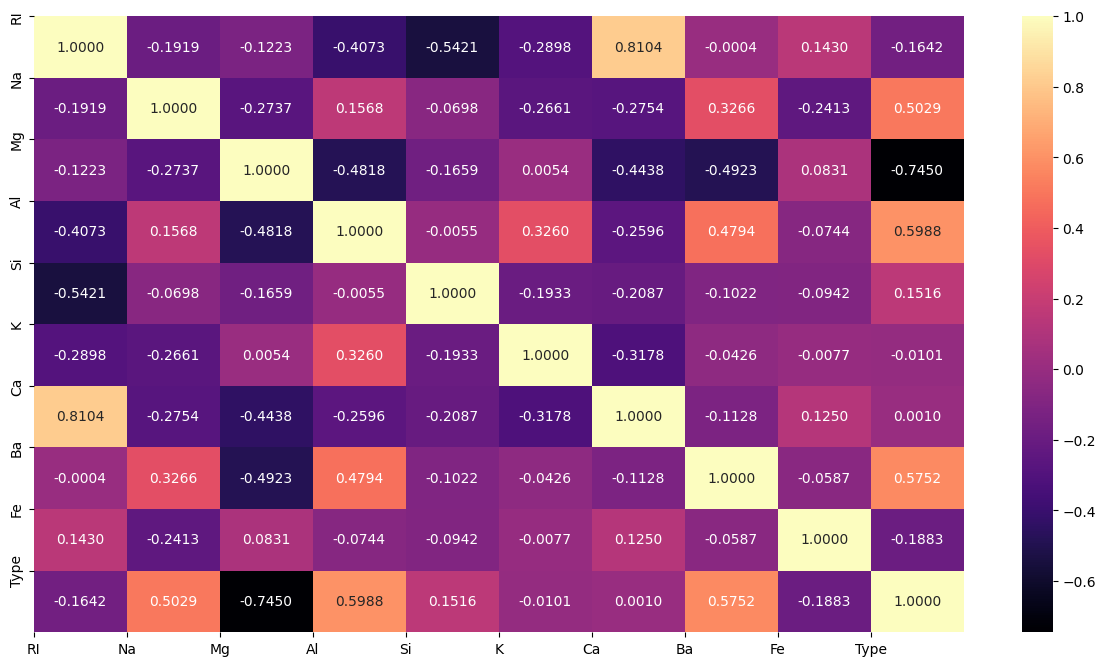

In [8]:
corr = Glass.corr()
from typing import ChainMap
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".4f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


**Features which are more correlated with eachother represented with a warm color like orange,pink features which are not so related with eachother represented using cool colors like black,navy blue. **bold text**

**There is a correlation matrix that is plotted on the heat map to show how features are corelated with eachother**

In [9]:
#independent & dependent variables
array = Glass.values
X = array[:,0:-1]
y = array[:,-1]

In [10]:
Glass.duplicated().sum()

1

In [11]:
Glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

**As the data points are in different scales before moving further we have to make data in one scale**

**Normalizing the data so that data points rescaled & end up in a range of 0 to 1 using min-max scaling technique.**

In [12]:
X = (X - X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [13]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,shuffle=True,random_state=19)

In [14]:
X_train.shape

(149, 9)

In [15]:
X_test.shape

(65, 9)

In [16]:
y_train.shape

(149,)

In [17]:
y_test.shape

(65,)

In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
SC_X= StandardScaler()
X_train= SC_X.fit_transform(X_train)
X_test = SC_X.transform(X_test)

In [19]:
counter = Counter(y_train)
print(counter)

Counter({2.0: 54, 1.0: 50, 7.0: 21, 3.0: 13, 5.0: 6, 6.0: 5})


**Training Model Using KNN Classifier on Glass Dataset**

In [20]:
#Model Building
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski', p=2)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

**Evaluating the model by running predictions on test data**

In [21]:
y_pred = knn.predict(X_test)


In [22]:
accuracy_score(y_pred,y_test)

0.6923076923076923

**We got accuracy Score as 70% which is a good score, means our model is 70% accurate on predicting values compared to the actual ones**

In [23]:
pred_data = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
pred_data

,Actual,Predicted
0,2.0,3.0
1,2.0,1.0
2,3.0,1.0
3,1.0,1.0
4,2.0,2.0
...,...,...
60,7.0,7.0
61,1.0,1.0
62,3.0,1.0
63,6.0,6.0


**As we can see our prediction values are somehow correct as if we compared it with the actual ones**

**Using Confusion matrix & displaying classification reports**

In [24]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
print(confusion_matrix(y_test,y_pred))

[[17  2  1  0  0  0]
 [ 6 13  1  2  0  0]
 [ 3  1  0  0  0  0]
 [ 0  2  0  4  0  1]
 [ 0  1  0  0  3  0]
 [ 0  0  0  0  0  8]]


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.65      0.85      0.74        20
         2.0       0.68      0.59      0.63        22
         3.0       0.00      0.00      0.00         4
         5.0       0.67      0.57      0.62         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.69        65
   macro avg       0.65      0.63      0.63        65
weighted avg       0.68      0.69      0.68        65



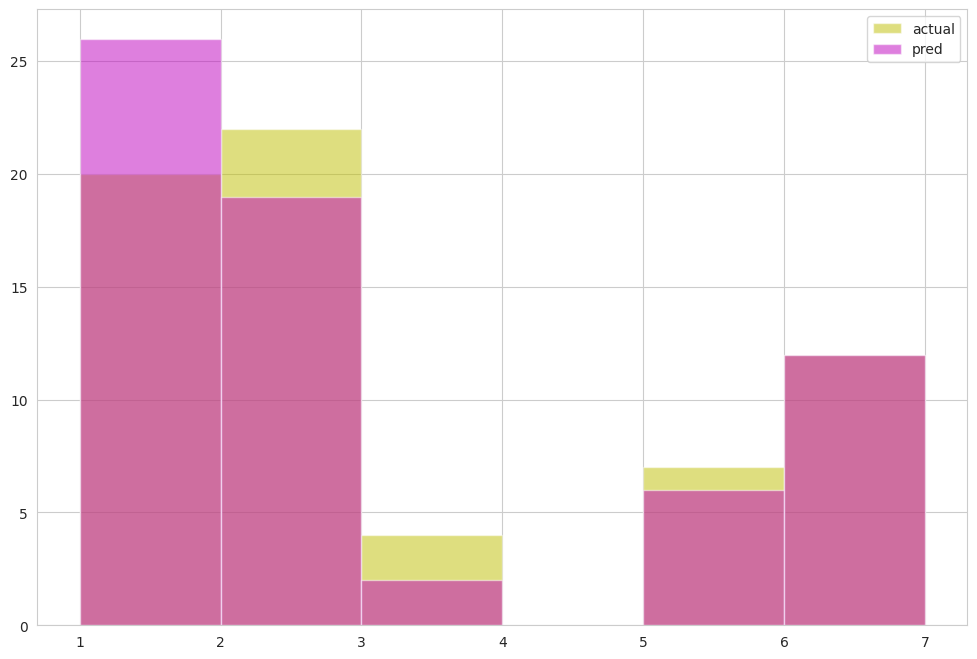

In [26]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'y', alpha = 0.5, label = 'actual', bins=6)
ax.hist(y_pred, color = 'm', alpha = 0.5, label = 'pred', bins=6)
ax.legend(loc = 'best')
plt.show()

**This visualization tells us category wise total number of features according to the test and predicted data.**

**here color overlapping indicates that the predictions are somehow matching our actual values.**

**For Category 3,5,6 Model failed to identify glass type as it belonging to category 3,5,6 and marked it into being in Category 1,2.**

**For the above model we have passed n_neighbors as lets try some other values for n to check how model performs for different values on n_neighbors.**

In [27]:
#Model Building
knn1 = KNeighborsClassifier(n_neighbors=2,metric='minkowski', p=2)
knn1.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=2)

**Evaluating the model by running predictions on test data**

In [28]:
y_pred1 = knn1.predict(X_test)

In [29]:
accuracy_score(y_pred1,y_test)

0.676923076923077

**We got accuracy Score as 66% which is not good, means our model is only 66% accurate on predicting values compared to the actual ones**

In [30]:
pred_data1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred1})
pred_data1

,Actual,Predicted
0,2.0,2.0
1,2.0,1.0
2,3.0,1.0
3,1.0,1.0
4,2.0,2.0
...,...,...
60,7.0,7.0
61,1.0,1.0
62,3.0,1.0
63,6.0,6.0


**As we can see our prediction values are not much satisfying as if we compared it with the actual ones**

**Using Confusion matrix & displaying classification reports**

In [31]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
print(confusion_matrix(y_test,y_pred1))

[[18  2  0  0  0  0]
 [10 12  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 0  3  0  3  0  1]
 [ 0  1  0  0  3  0]
 [ 0  0  0  0  0  8]]


In [32]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         1.0       0.56      0.90      0.69        20
         2.0       0.67      0.55      0.60        22
         3.0       0.00      0.00      0.00         4
         5.0       1.00      0.43      0.60         7
         6.0       1.00      0.75      0.86         4
         7.0       0.89      1.00      0.94         8

    accuracy                           0.68        65
   macro avg       0.69      0.60      0.62        65
weighted avg       0.68      0.68      0.65        65



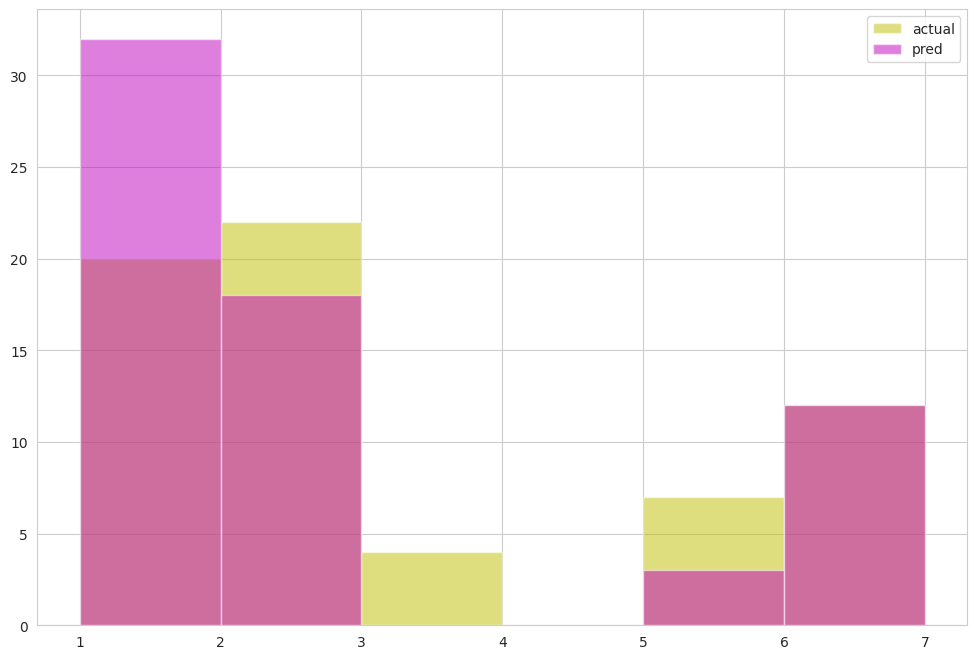

In [33]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'y', alpha = 0.5, label = 'actual', bins=6)
ax.hist(y_pred1, color = 'm', alpha = 0.5, label = 'pred', bins=6)
ax.legend(loc = 'best')
plt.show()

**As compared to the last visualization this visualization is more bad in predicting values.**



**We have to configure this by balancing the data using different Method, here we are going to use SMOTE for balancing the data then we will build KNN model to see if our model accuracy is improved or not.**

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#Identifying the minority class samples in the training set
minority_class_indices = np.where(y_train == 1)[0]

In [37]:
#Applying SMOTE to generate synthetic samples for the minority class
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [38]:
#Combine the original and synthetic samples to create a new training set with balanced class distribution
X_train_balanced = np.concatenate((X_train, X_train_smote), axis=0)
y_train_balanced = np.concatenate((y_train, y_train_smote), axis=0)


In [39]:
X_train_balanced.shape

(543, 9)

In [40]:
y_train_balanced.shape

(543,)

In [41]:
X_train_balanced

array([[0.20851624, 0.31428571, 0.78396437, ..., 0.23605948, 0.        ,
        0.        ],
       [0.3595259 , 0.43759398, 0.78841871, ..., 0.32156134, 0.04761905,
        0.47058824],
       [0.30860404, 0.44962406, 0.        , ..., 0.51672862, 0.        ,
        0.        ],
       ...,
       [0.26050552, 0.53086778, 0.        , ..., 0.2956159 , 0.52724668,
        0.01259032],
       [0.2932993 , 0.42440638, 0.72986874, ..., 0.17404157, 0.16970141,
        0.        ],
       [0.24871898, 0.63033219, 0.        , ..., 0.2781666 , 0.49906496,
        0.        ]])

In [42]:
y_train_balanced

array([2., 3., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 7., 2., 5., 1.,
       1., 2., 1., 7., 5., 2., 1., 2., 6., 1., 1., 1., 1., 1., 2., 2., 2.,
       1., 2., 5., 2., 1., 3., 2., 2., 1., 2., 2., 2., 1., 2., 1., 3., 2.,
       2., 2., 2., 1., 7., 1., 1., 2., 2., 1., 1., 7., 6., 1., 1., 2., 7.,
       3., 1., 1., 2., 3., 2., 3., 2., 1., 1., 2., 3., 6., 1., 7., 3., 2.,
       5., 1., 1., 2., 1., 2., 1., 7., 3., 2., 1., 7., 1., 2., 5., 1., 3.,
       1., 2., 1., 2., 7., 5., 7., 1., 2., 1., 1., 2., 2., 2., 7., 7., 2.,
       1., 1., 1., 6., 2., 1., 5., 2., 7., 2., 6., 7., 1., 1., 2., 1., 5.,
       7., 5., 1., 1., 2., 1., 1., 3., 7., 7., 2., 1., 3., 7., 1., 1., 3.,
       2., 3., 2., 2., 2., 2., 7., 2., 2., 7., 1., 7., 2., 2., 1., 2., 6.,
       2., 2., 3., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 7., 2., 5.,
       1., 1., 2., 1., 7., 5., 2., 1., 2., 6., 1., 1., 1., 1., 1., 2., 2.,
       2., 1., 2., 5., 2., 1., 3., 2., 2., 1., 2., 2., 2., 1., 2., 1., 3.,
       2., 2., 2., 2., 1.

In [43]:
# Fit your KNN model on the new training set and evaluate its performance on the testing set
knn2 = KNeighborsClassifier(n_neighbors=2,metric='minkowski', p=2)
knn2.fit(X_train_balanced, y_train_balanced)


KNeighborsClassifier(n_neighbors=2)

**Evaluating the model by running predictions on test data**

In [44]:
y_pred2 = knn2.predict(X_test)

In [45]:
accuracy_score(y_pred2,y_test)

0.813953488372093

**As we can see application of SMOTE method for balancing data set has worked very well.**

**Our model accuracy level jumps from 66% to 81% which means our model is 81% accurate on predicting values compared to the actual ones.**

In [46]:
pred_data2 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred2})
pred_data2

,Actual,Predicted
0,1.0,1.0
1,7.0,7.0
2,1.0,1.0
3,7.0,7.0
4,2.0,2.0
5,2.0,2.0
6,1.0,1.0
7,2.0,2.0
8,2.0,2.0
9,2.0,1.0


**Here we can see the improvement, we have placed predicted values against the actual ones and the values are exactly same.**

**Using Confusion matrix & displaying classification reports**

In [47]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
print(confusion_matrix(y_test,y_pred2))

[[ 9  1  1  0  0  0]
 [ 3 11  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  1  7]]


In [48]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         1.0       0.75      0.82      0.78        11
         2.0       0.85      0.79      0.81        14
         3.0       0.67      0.67      0.67         3
         5.0       0.80      1.00      0.89         4
         6.0       0.67      0.67      0.67         3
         7.0       1.00      0.88      0.93         8

    accuracy                           0.81        43
   macro avg       0.79      0.80      0.79        43
weighted avg       0.82      0.81      0.81        43



**We can see the improvement in precision, recall & f1 score if we compare it to the previous ones.**

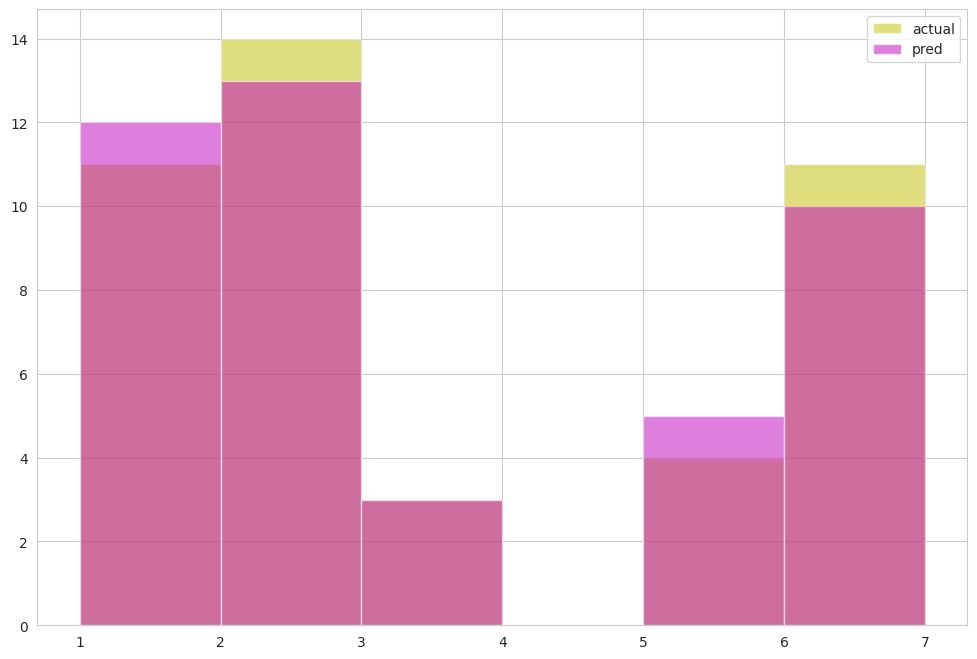

In [49]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'y', alpha = 0.5, label = 'actual', bins=6)
ax.hist(y_pred2, color = 'm', alpha = 0.5, label = 'pred', bins=6)
ax.legend(loc = 'best')
plt.show()

**This visualization tells us category wise total number of features according to the test and predicted data.**

**here color overlapping indicates that the predictions are almost matching our actual values, or we can say much better from the previous visualizations**